In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
from glob import glob

import enterprise
from enterprise.pulsar import Pulsar
from enterprise.signals import parameter,white_signals,gp_signals,signal_base
from enterprise.signals.utils import powerlaw

from enterprise.signals import anis_coefficients as ac

from enterprise_extensions import blocks
from enterprise_extensions.model_utils import get_tspan

import healpy as hp
import pickle

from la_forge.core import Core

import sys
sys.path.append('../')

from defiant import OptimalStatistic
from defiant import utils, plotting
from defiant.extra import mdc1_utils

import maps
from maps.anis_pta import anis_pta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Lets try using the radiometer pixel basis

In [16]:
# For now, lets just use MDC1 pulsars
psrs,inj_params = mdc1_utils.get_mdc1_psrs()
pta = mdc1_utils.create_MDC1_PTA(psrs)

psr_theta = np.array([p.theta for p in psrs])
psr_phi = np.array([p.phi for p in psrs])

OS_obj = OptimalStatistic(psrs,pta,'gw','MDC1_FG_CURN_samples.core')

nside = 4
lmax = 6

Loading data from HDF5 file....


0.0 180.0 -180.0 180.0


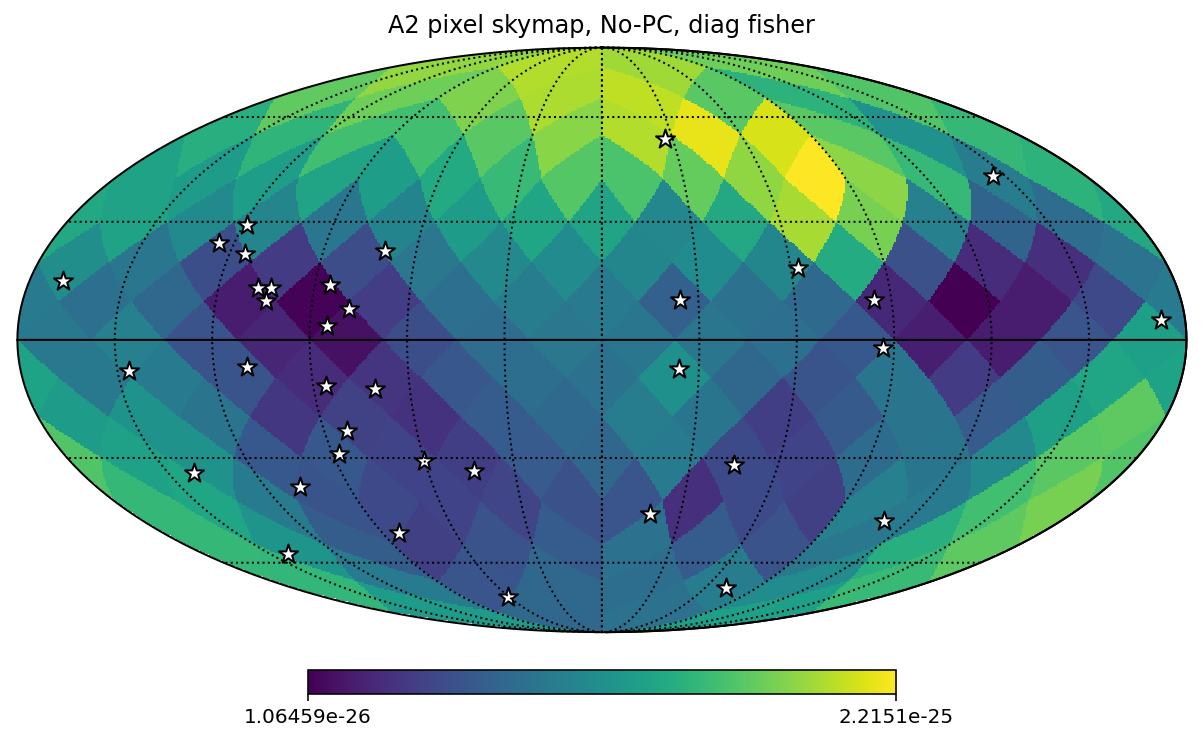

0.0 180.0 -180.0 180.0


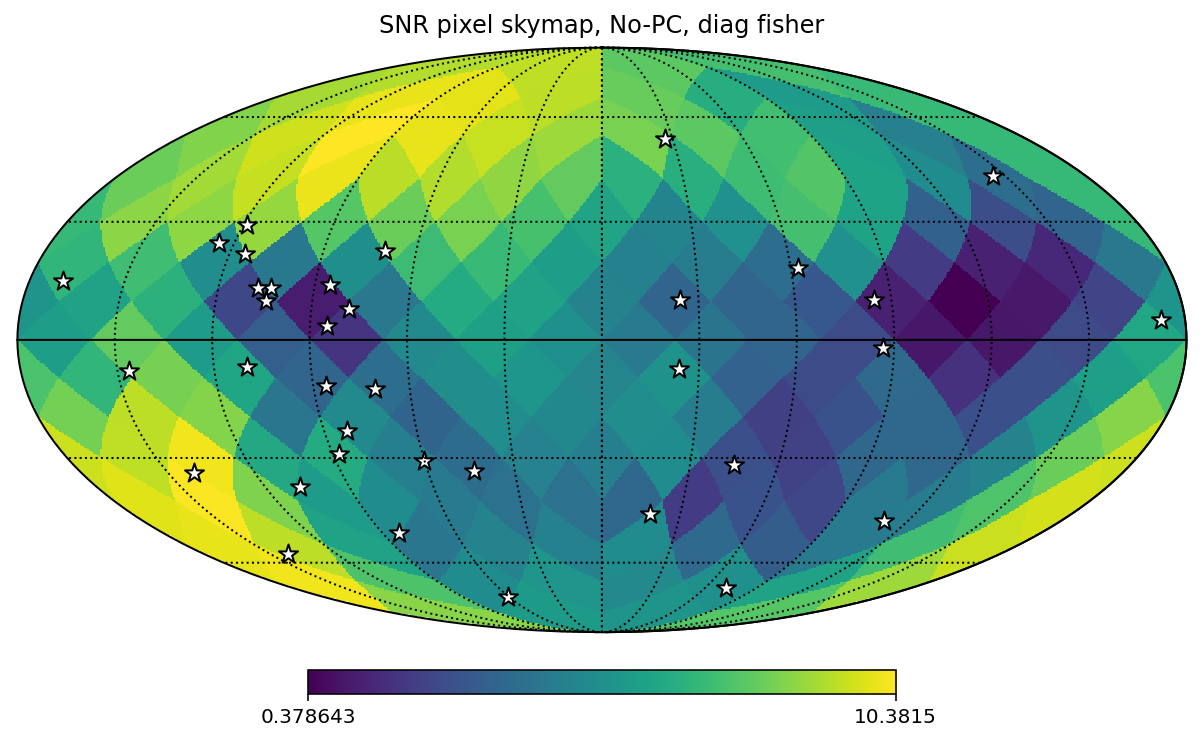

In [17]:
OS_obj.set_anisotropy_basis('pixel',nside,lmax,'hd')
xi,rho,sig,C,A2,A2s = OS_obj.compute_OS(inj_params,fisher_diag_only=True)


hp.mollview(utils.invert_skymap(A2),rot=180)
hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
hp.graticule()
plt.title('A2 pixel skymap, No-PC, diag fisher')
plt.show()

SNR = A2/np.sqrt(np.diag(A2s))
hp.mollview(utils.invert_skymap(SNR),rot=180)
hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
hp.graticule()
plt.title('SNR pixel skymap, No-PC, diag fisher')
plt.show()

0.0 180.0 -180.0 180.0


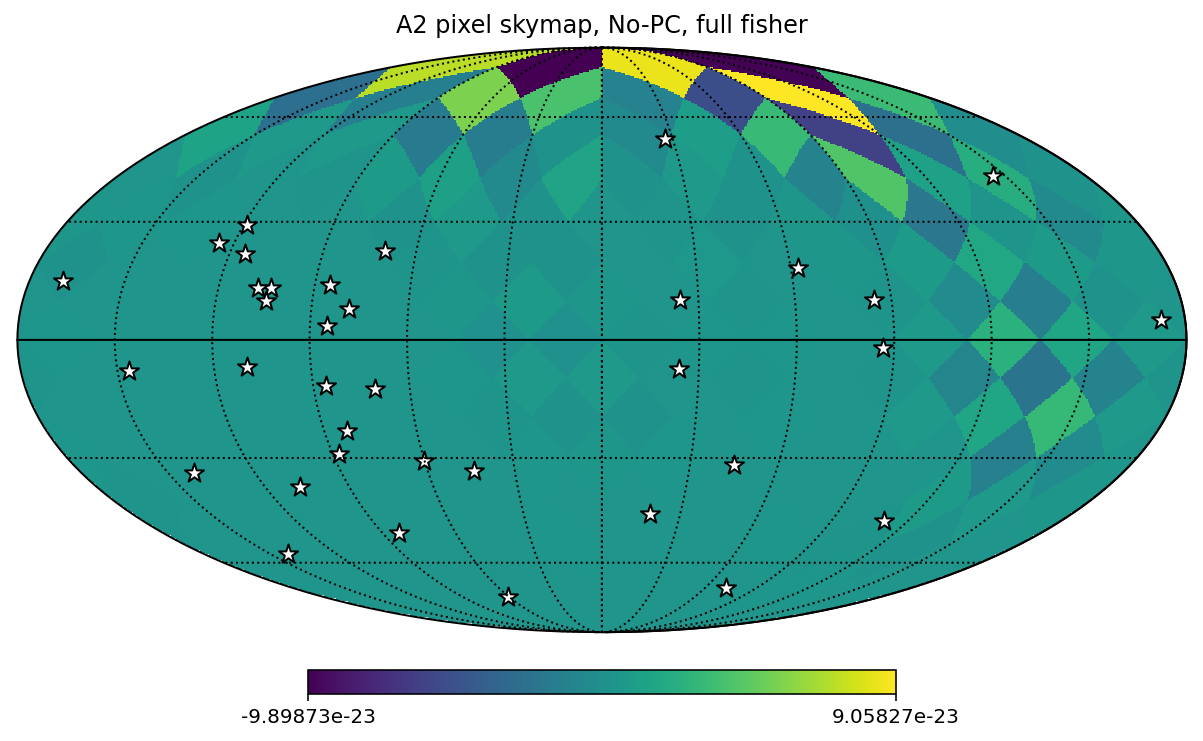

0.0 180.0 -180.0 180.0


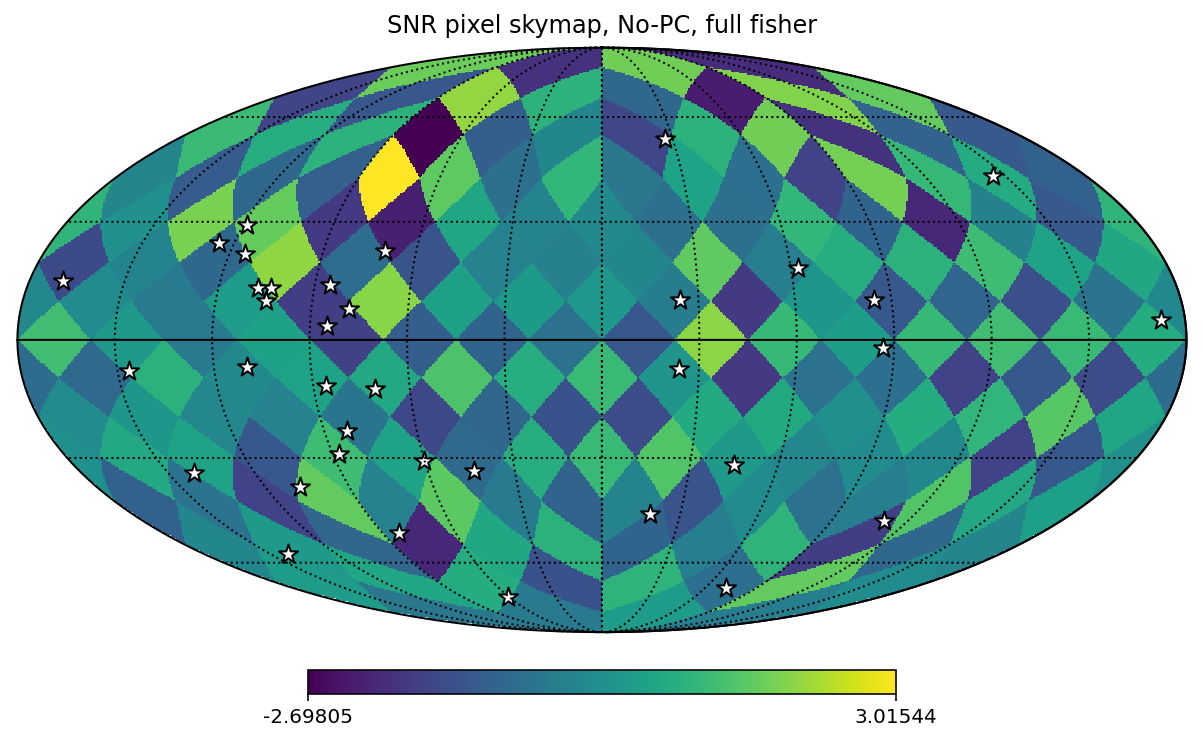

In [18]:
OS_obj.set_anisotropy_basis('pixel',nside,lmax,'hd')
xi,rho,sig,C,A2,A2s = OS_obj.compute_OS(inj_params,fisher_diag_only=False)


hp.mollview(utils.invert_skymap(A2),rot=180)
hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
hp.graticule()
plt.title('A2 pixel skymap, No-PC, full fisher')
plt.show()

SNR = A2/np.sqrt(np.diag(A2s))
hp.mollview(utils.invert_skymap(SNR),rot=180)
hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
hp.graticule()
plt.title('SNR pixel skymap, No-PC, full fisher')
plt.show()

0.0 180.0 -180.0 180.0


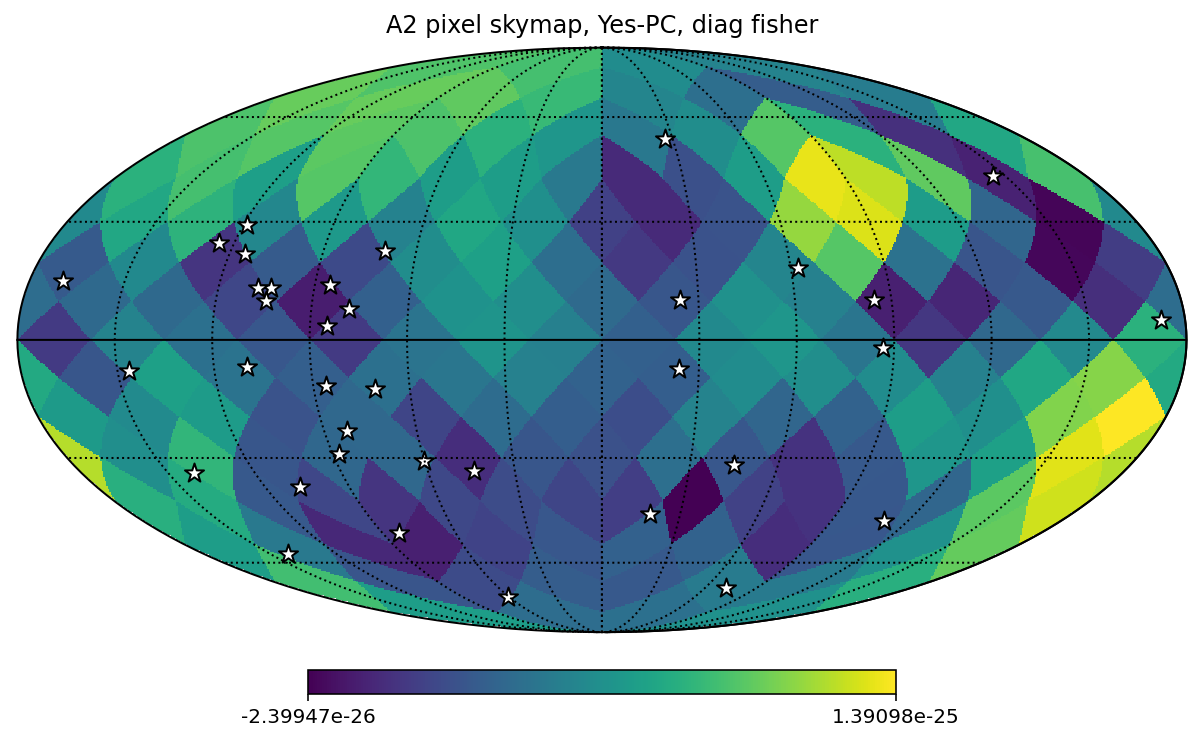

0.0 180.0 -180.0 180.0


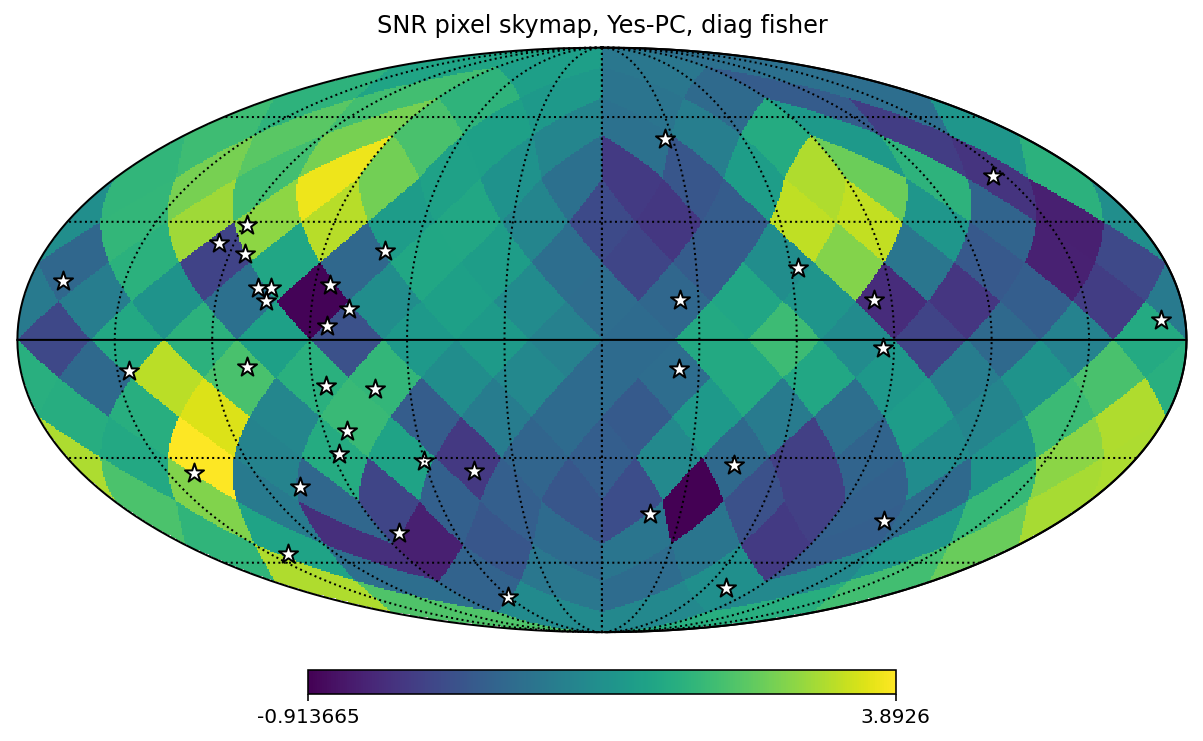

In [19]:
OS_obj.set_anisotropy_basis('pixel',nside,lmax,'hd')
xi,rho,sig,C,A2,A2s = OS_obj.compute_OS(inj_params,pair_covariance=True,fisher_diag_only=True)


A2[A2 <= min(A2)] = 0
hp.mollview(utils.invert_skymap(A2),rot=180)
hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
hp.graticule()
plt.title('A2 pixel skymap, Yes-PC, diag fisher')
plt.show()

clipped = utils.clip_covariance(A2s,1e-60)
SNR = A2/np.sqrt(np.diag(clipped))
hp.mollview(utils.invert_skymap(SNR),rot=180)
hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
hp.graticule()
plt.title('SNR pixel skymap, Yes-PC, diag fisher')
plt.show()

0.0 180.0 -180.0 180.0


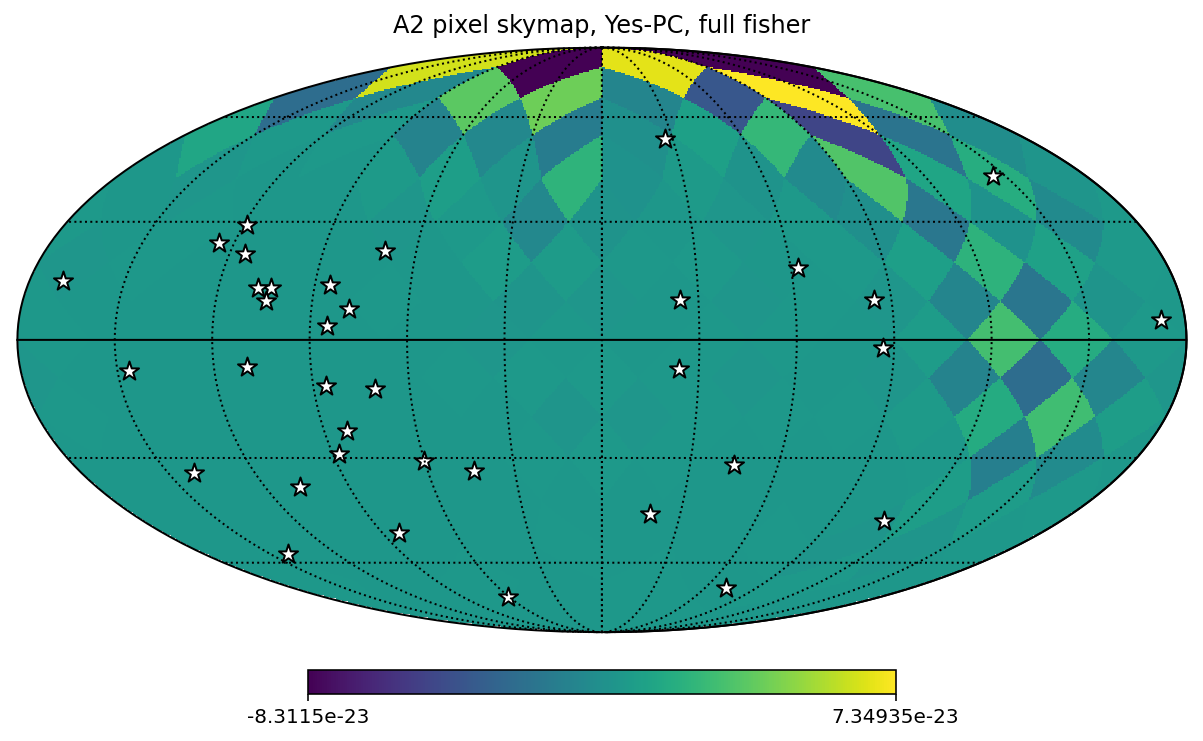

0.0 180.0 -180.0 180.0


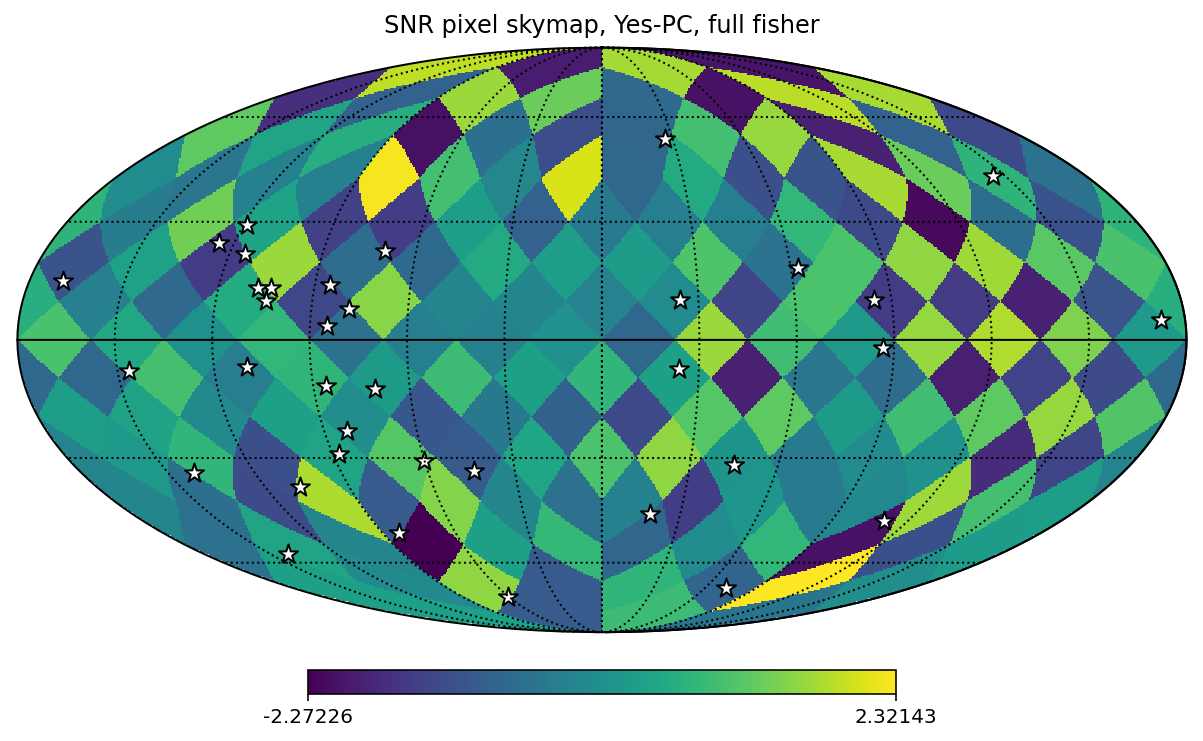

In [20]:
OS_obj.set_anisotropy_basis('pixel',nside,lmax,'hd')
xi,rho,sig,C,A2,A2s = OS_obj.compute_OS(inj_params,pair_covariance=True,fisher_diag_only=False)


hp.mollview(utils.invert_skymap(A2),rot=180)
hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
hp.graticule()
plt.title('A2 pixel skymap, Yes-PC, full fisher')
plt.show()

SNR = A2/np.sqrt(np.diag(A2s))
hp.mollview(utils.invert_skymap(SNR),rot=180)
hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
hp.graticule()
plt.title('SNR pixel skymap, Yes-PC, full fisher')
plt.show()

## Now for the Spherical harmonic basis

0.0 180.0 -180.0 180.0


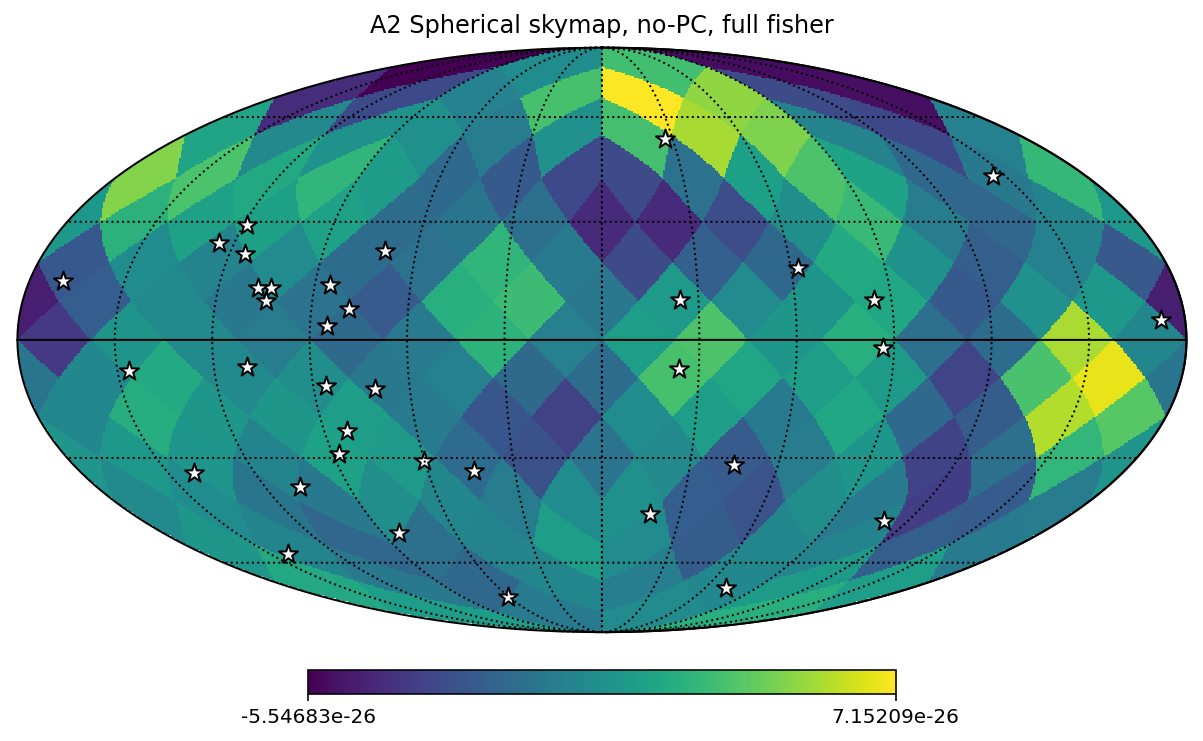

0.0 180.0 -180.0 180.0


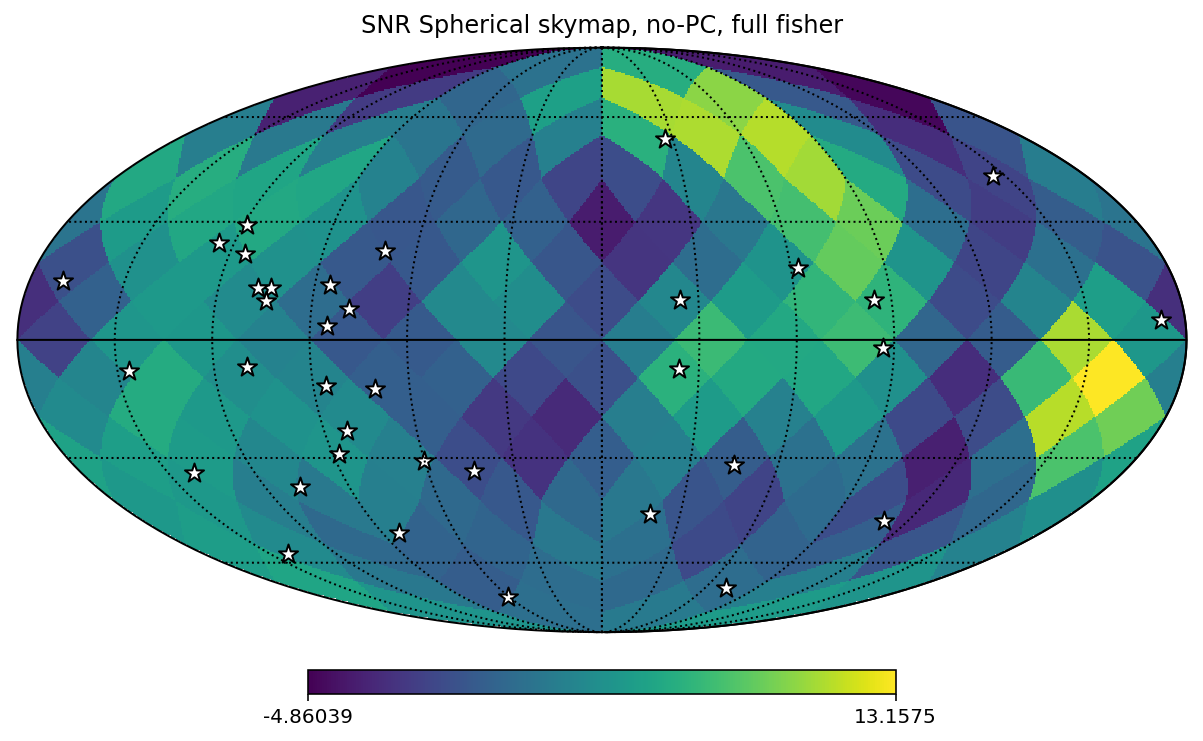

In [21]:
OS_obj.set_anisotropy_basis('spherical',nside,lmax,'hd')
xi,rho,sig,C,A2,A2s = OS_obj.compute_OS(inj_params,pair_covariance=False,fisher_diag_only=False)


# First we need a skymap from the clm
a2_map = ac.mapFromClm_fast(A2,nside)

hp.mollview(utils.invert_skymap(a2_map),rot=180)
hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
hp.graticule()
plt.title('A2 Spherical skymap, no-PC, full fisher')
plt.show()


SNR = A2/np.sqrt(np.diag(A2s))
snr_map = ac.mapFromClm_fast(SNR,nside)
hp.mollview(utils.invert_skymap(snr_map),rot=180)
hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
hp.graticule()
plt.title('SNR Spherical skymap, no-PC, full fisher')
plt.show()

0.0 180.0 -180.0 180.0


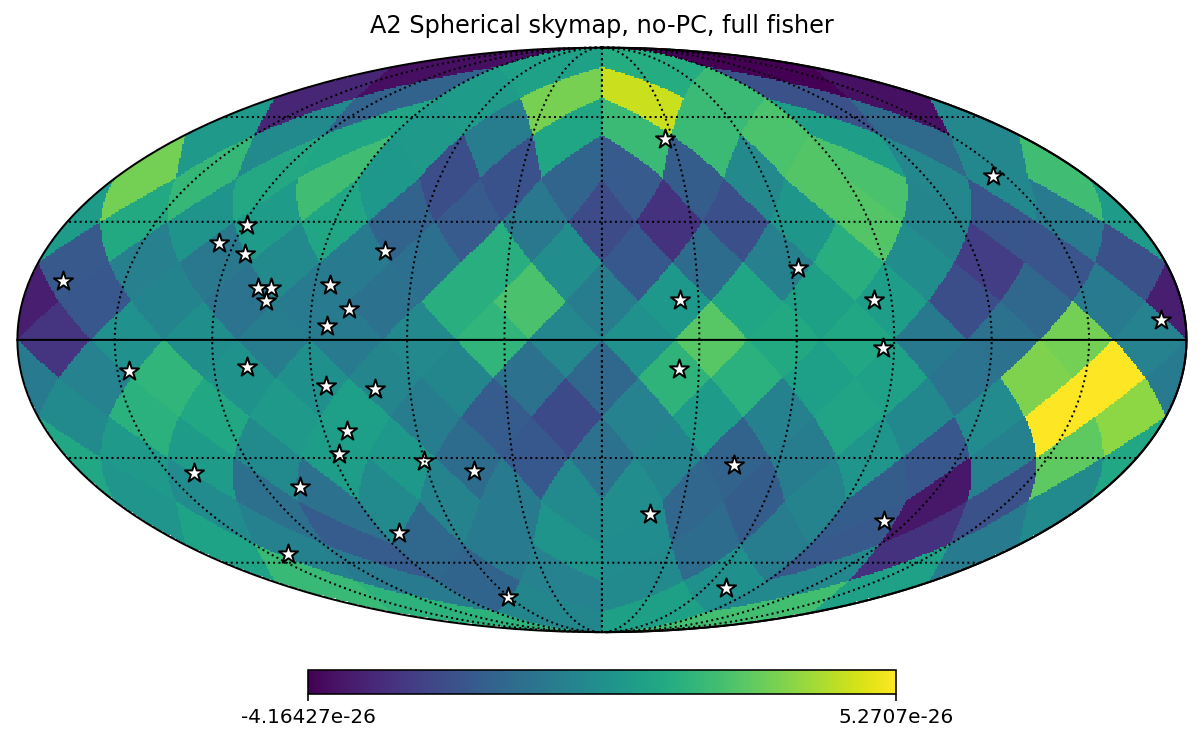

0.0 180.0 -180.0 180.0


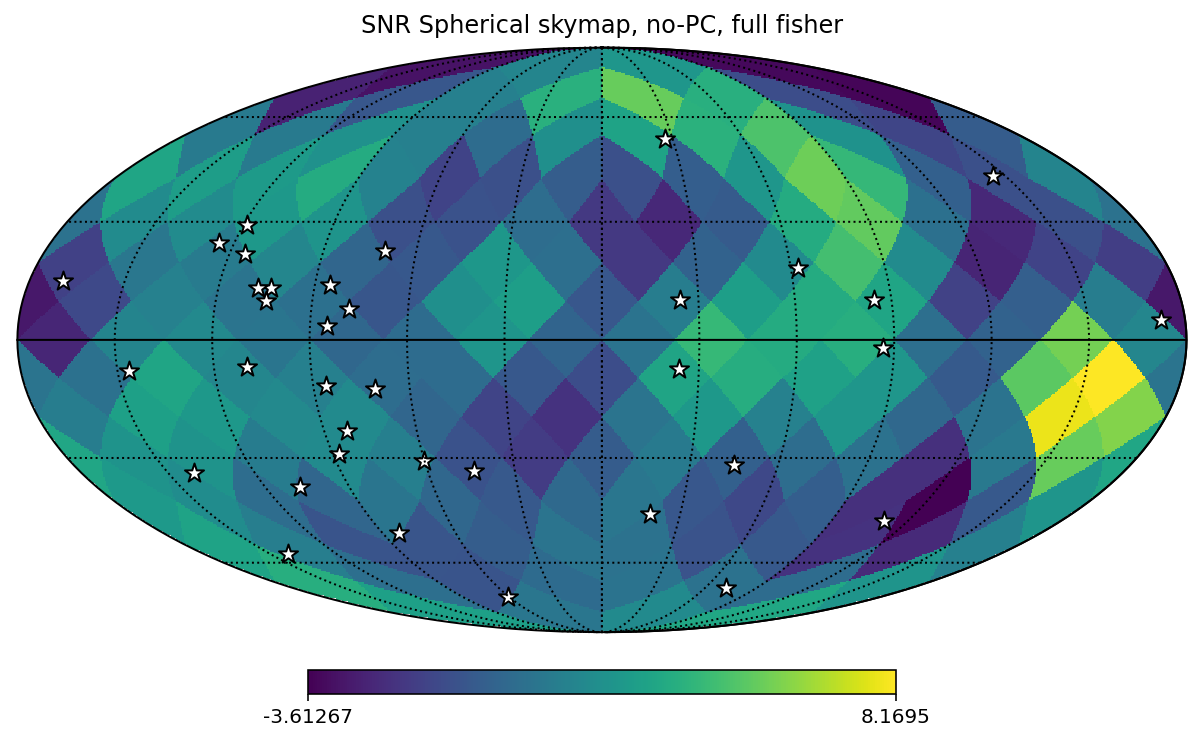

In [22]:
OS_obj.set_anisotropy_basis('spherical',nside,lmax,'hd')
xi,rho,sig,C,A2,A2s = OS_obj.compute_OS(inj_params,pair_covariance=True,fisher_diag_only=False)

# First we need a skymap from the clm
a2_map = ac.mapFromClm_fast(A2,nside)

hp.mollview(utils.invert_skymap(a2_map),rot=180)
hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
hp.graticule()
plt.title('A2 Spherical skymap, no-PC, full fisher')
plt.show()

SNR = A2/np.sqrt(np.diag(A2s))
snr_map = ac.mapFromClm_fast(SNR,nside)
hp.mollview(utils.invert_skymap(snr_map),rot=180)
hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
hp.graticule()
plt.title('SNR Spherical skymap, no-PC, full fisher')
plt.show()

## Now lets try with an actual anisotropic PTA

In [23]:
with open('freshforkyle_mdc_style_cw.pkl','rb') as f:
    psrs = pickle.load(f)


Tspan = get_tspan(psrs)

efac = parameter.Constant(1.0)
ef = white_signals.MeasurementNoise(efac=efac)

curn = blocks.common_red_noise_block(psd='powerlaw',Tspan=Tspan,components=10,
                                     gamma_val=13./3.,logmin=-18,logmax=-12,name='gw')

tm = gp_signals.MarginalizingTimingModel(use_svd=True)

model = tm + ef + curn

pta = signal_base.PTA([model(psr) for psr in psrs])

In [24]:
OS_obj = OptimalStatistic(psrs,pta=pta,gwb_name='gw',core_path='anisotropy_CURN.core')
nside = 4
lmax = 6

psr_theta = np.array([p.theta for p in psrs])
psr_phi = np.array([p.phi for p in psrs])

Loading data from HDF5 file....


/Users/gersbaka/Documents/Projects/defiant/notebooks/../defiant/core.py:443: UserWarning: No parameters set without noise marginalization, defaulting to maximum likelihood OS.
  warn(msg)
0.0 180.0 -180.0 180.0


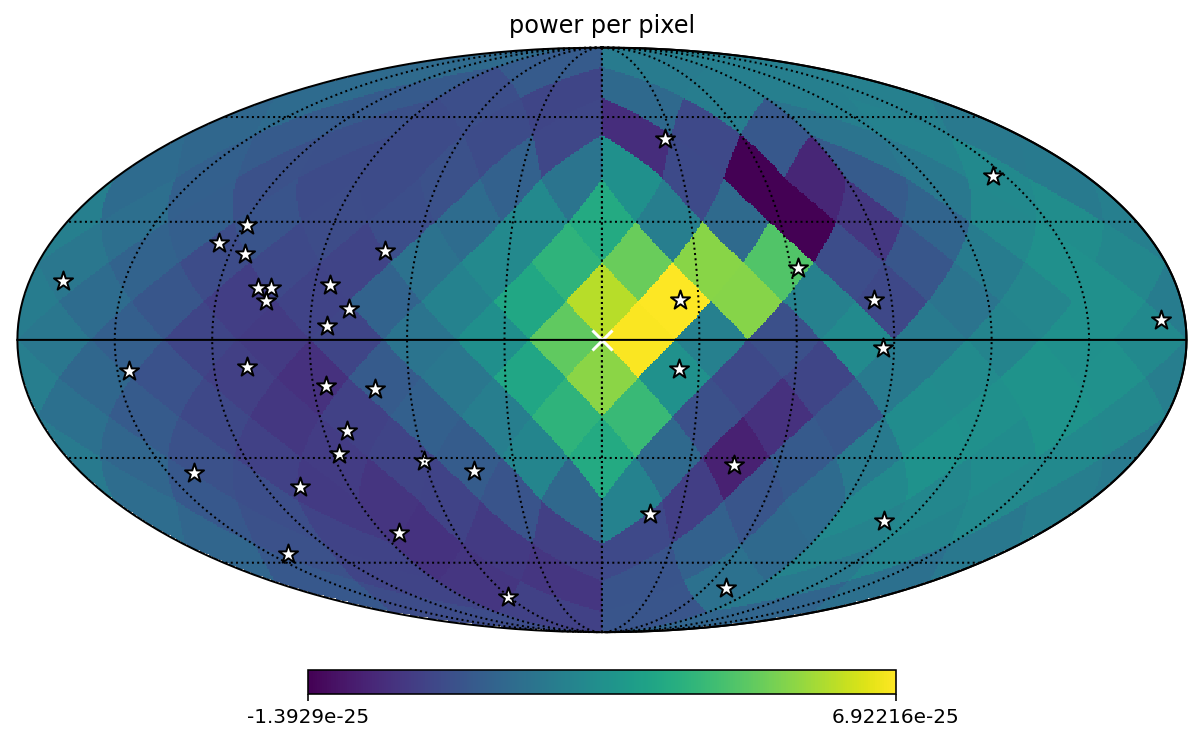

0.0 180.0 -180.0 180.0


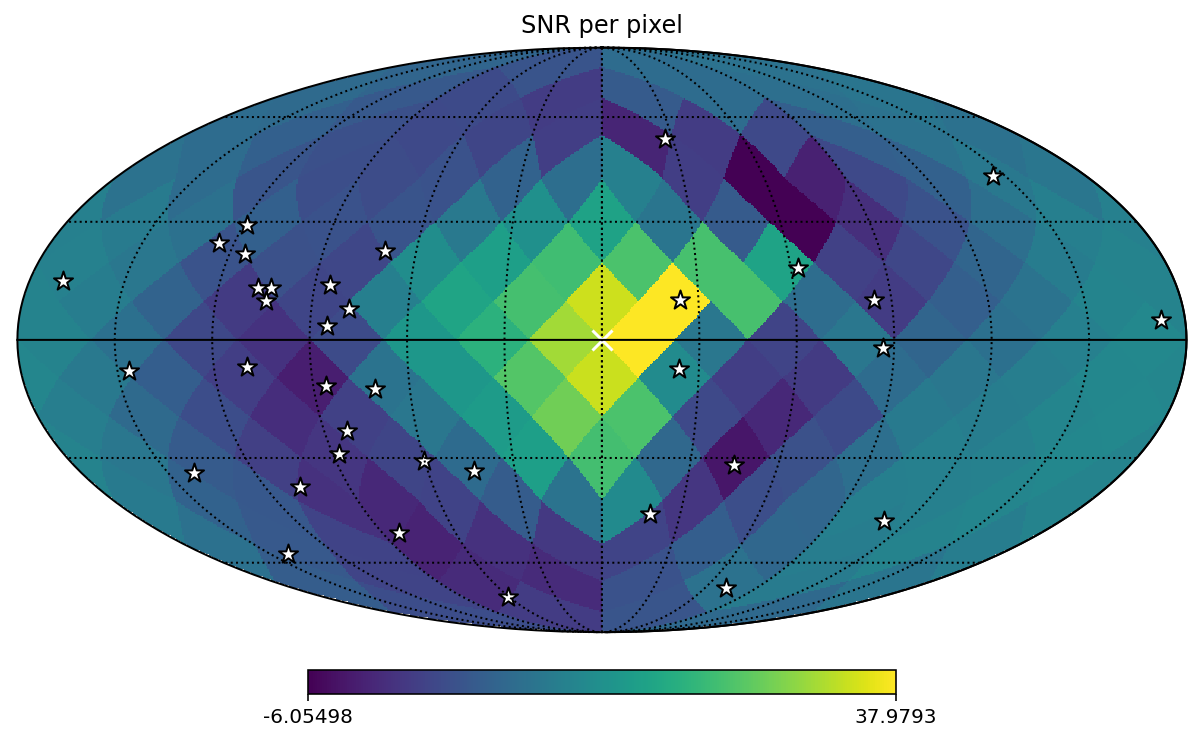

In [26]:

OS_obj.set_anisotropy_basis('pixel',nside,lmax,pc_orf='hd')
xi,rho,sig,C,A2,A2s = OS_obj.compute_OS(fisher_diag_only=True)

hp.mollview(utils.invert_skymap(A2),rot=180)
hp.visufunc.projscatter(theta=np.pi/2, phi=np.pi, c='white', s=100, marker='x')
hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
plt.title('power per pixel')
hp.graticule()
plt.show()

SNR = A2/np.sqrt(np.diag(A2s))
hp.mollview(utils.invert_skymap(SNR),rot=180)
hp.visufunc.projscatter(theta=np.pi/2, phi=np.pi, c='white', s=100, marker='x')
hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
plt.title('SNR per pixel')
hp.graticule()
plt.show()

/Users/gersbaka/Documents/Projects/defiant/notebooks/../defiant/core.py:612: UserWarning: No parameters set without noise marginalization, defaulting to maximum likelihood OS.
  warn(msg)


0.0 180.0 -180.0 180.0


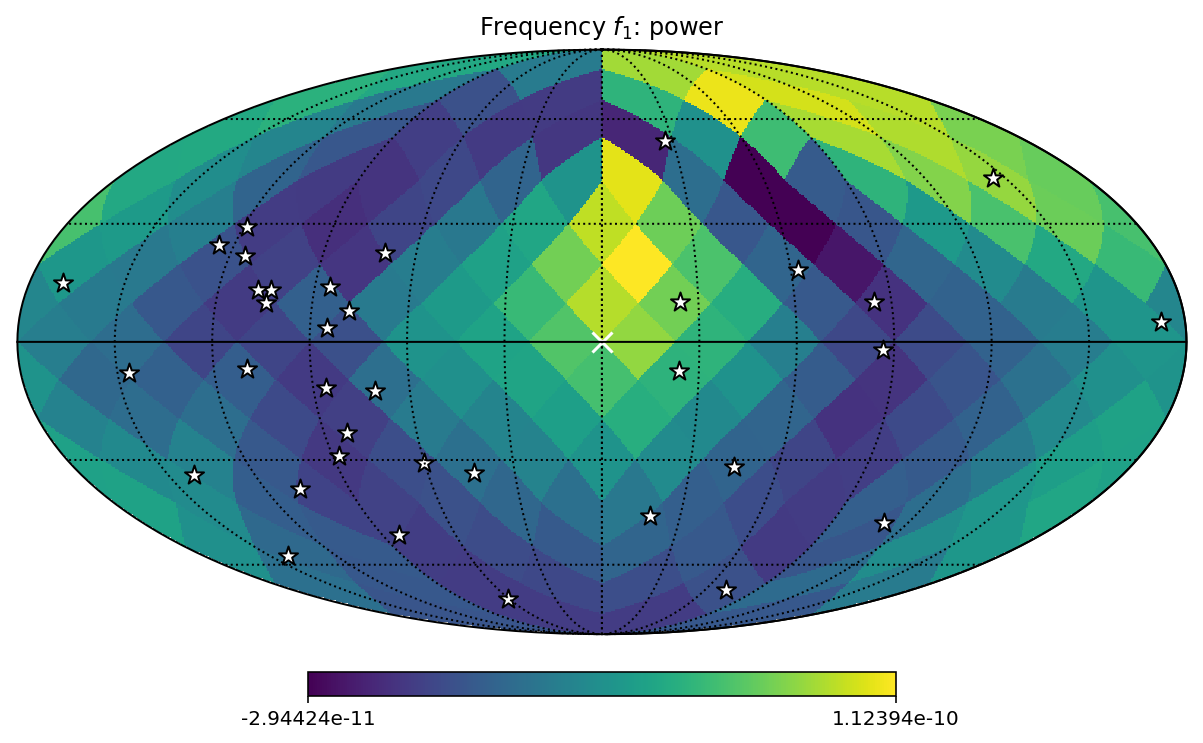

0.0 180.0 -180.0 180.0


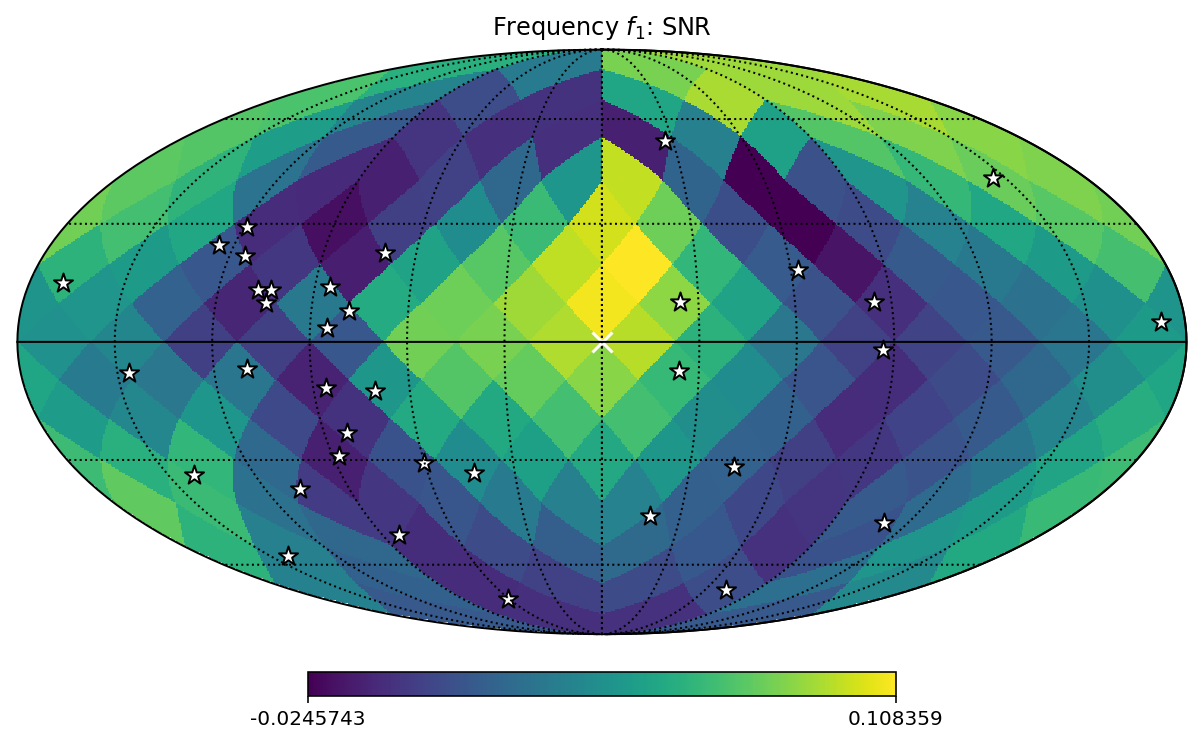

0.0 180.0 -180.0 180.0


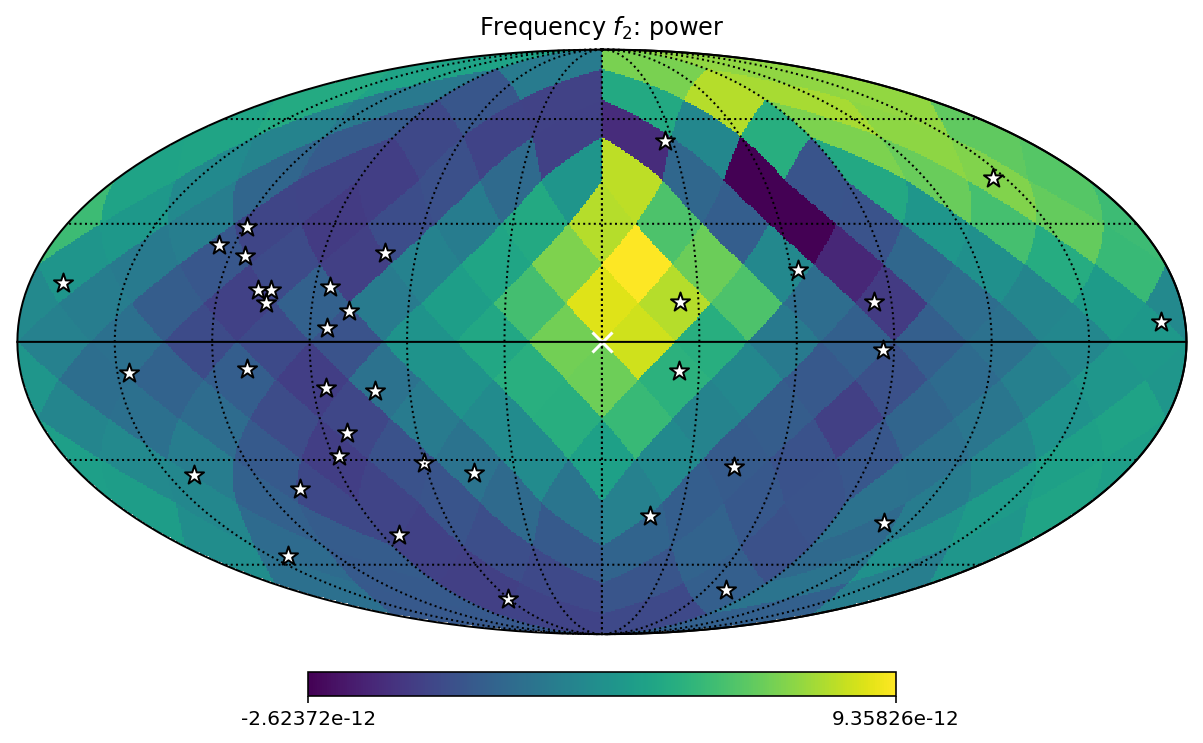

0.0 180.0 -180.0 180.0


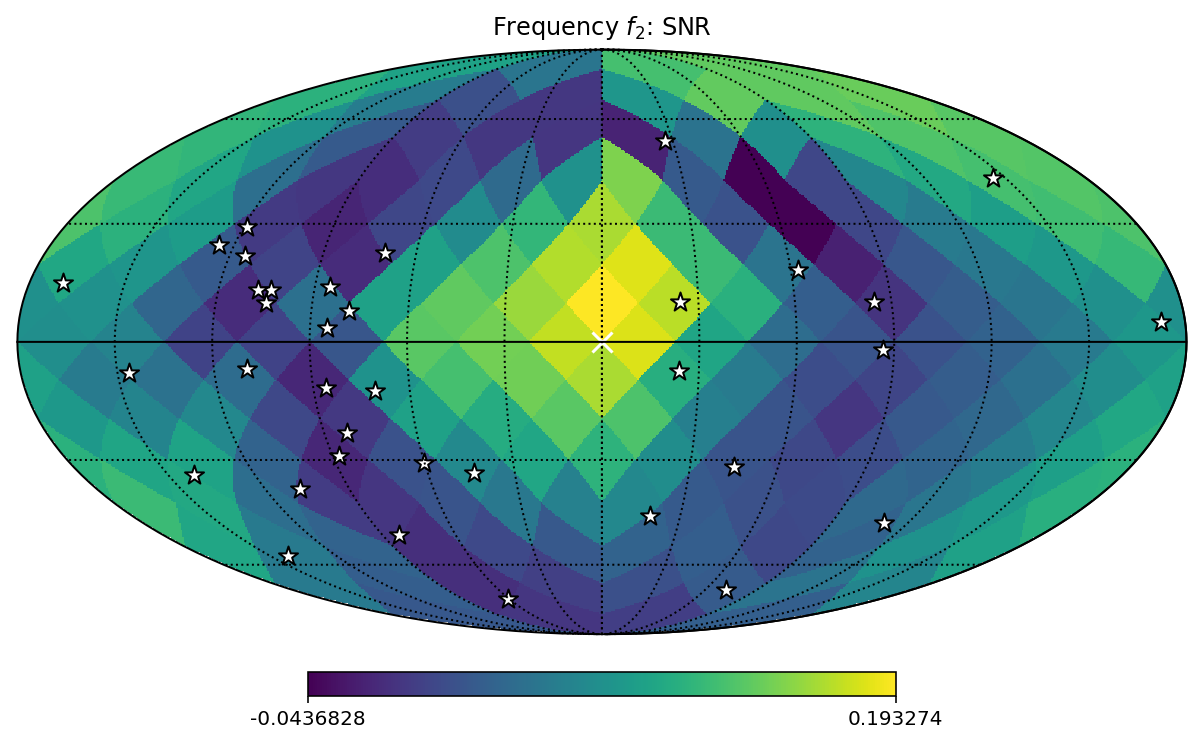

0.0 180.0 -180.0 180.0


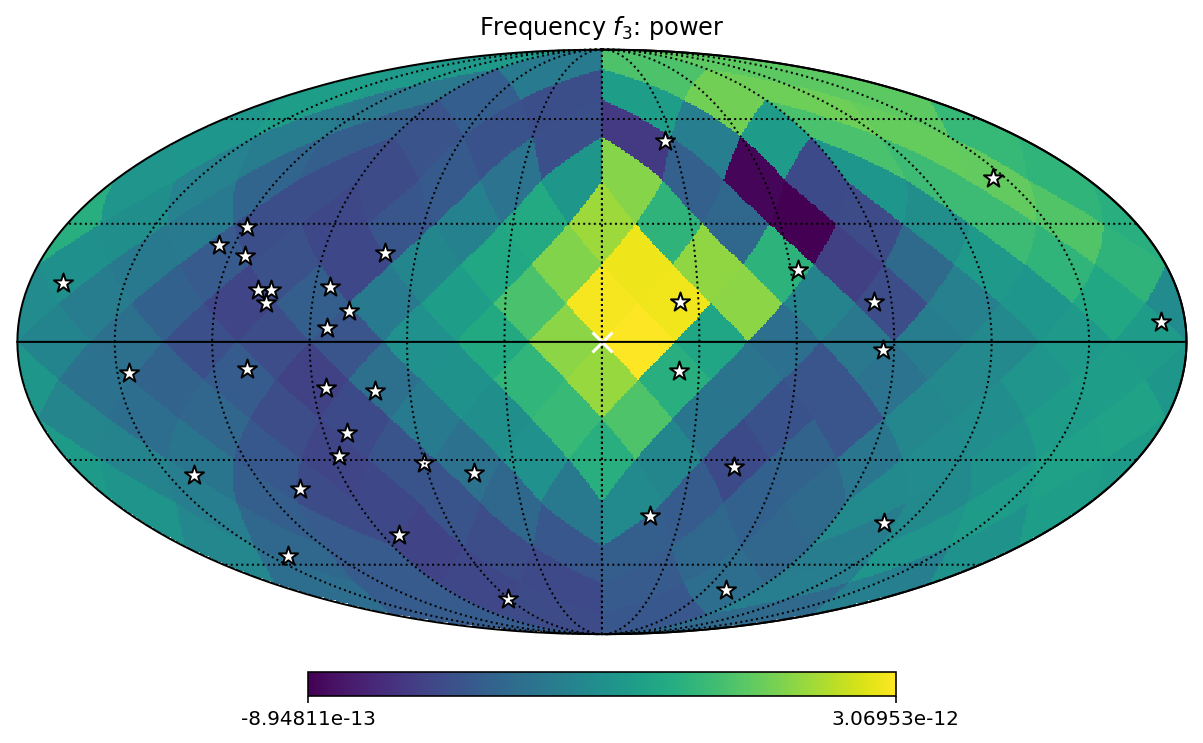

0.0 180.0 -180.0 180.0


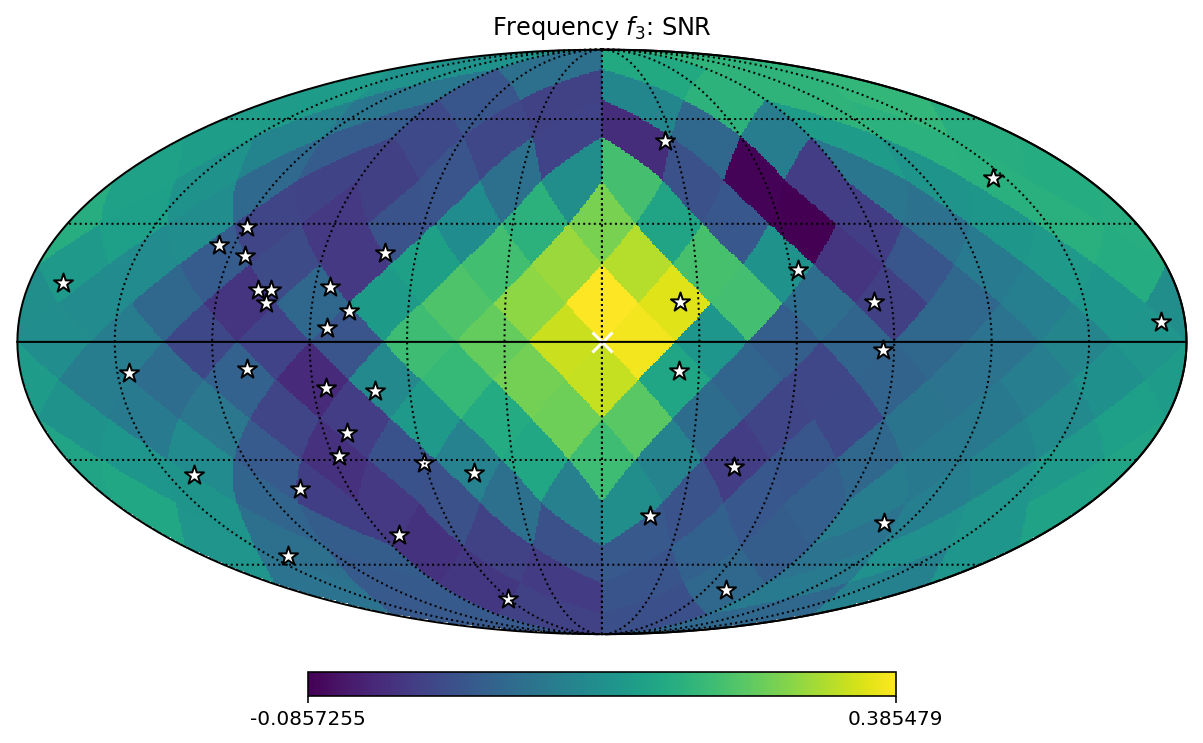

0.0 180.0 -180.0 180.0


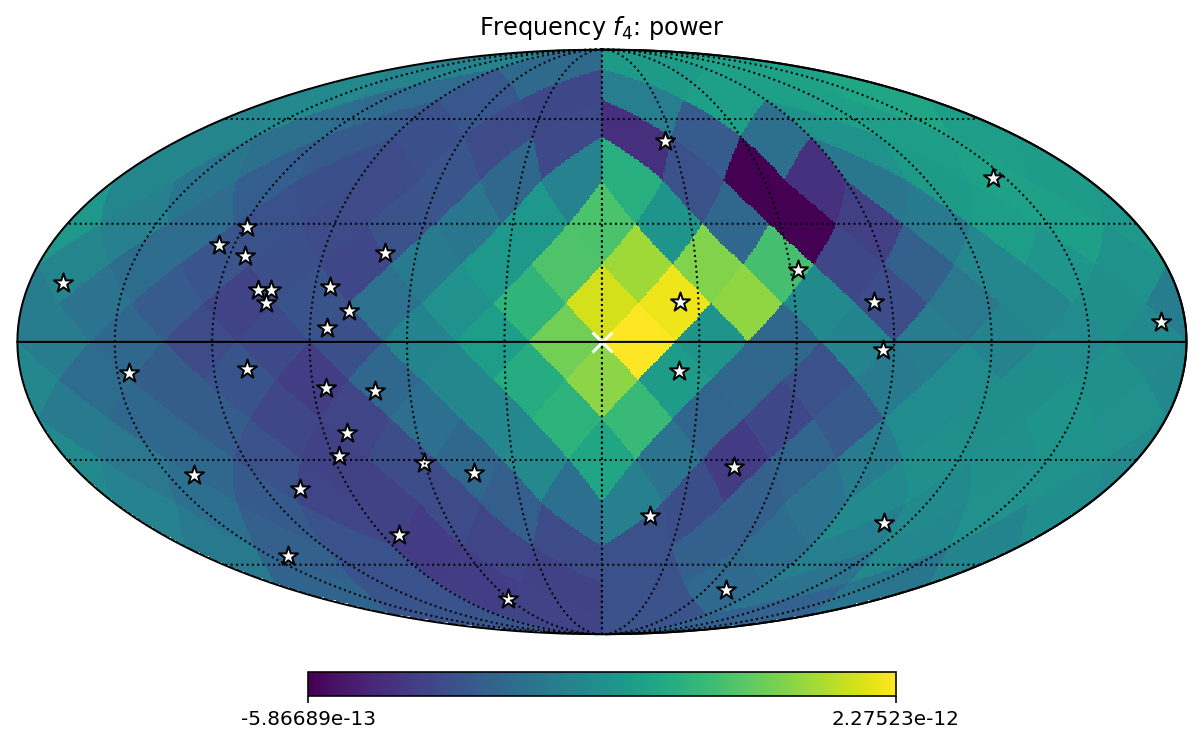

0.0 180.0 -180.0 180.0


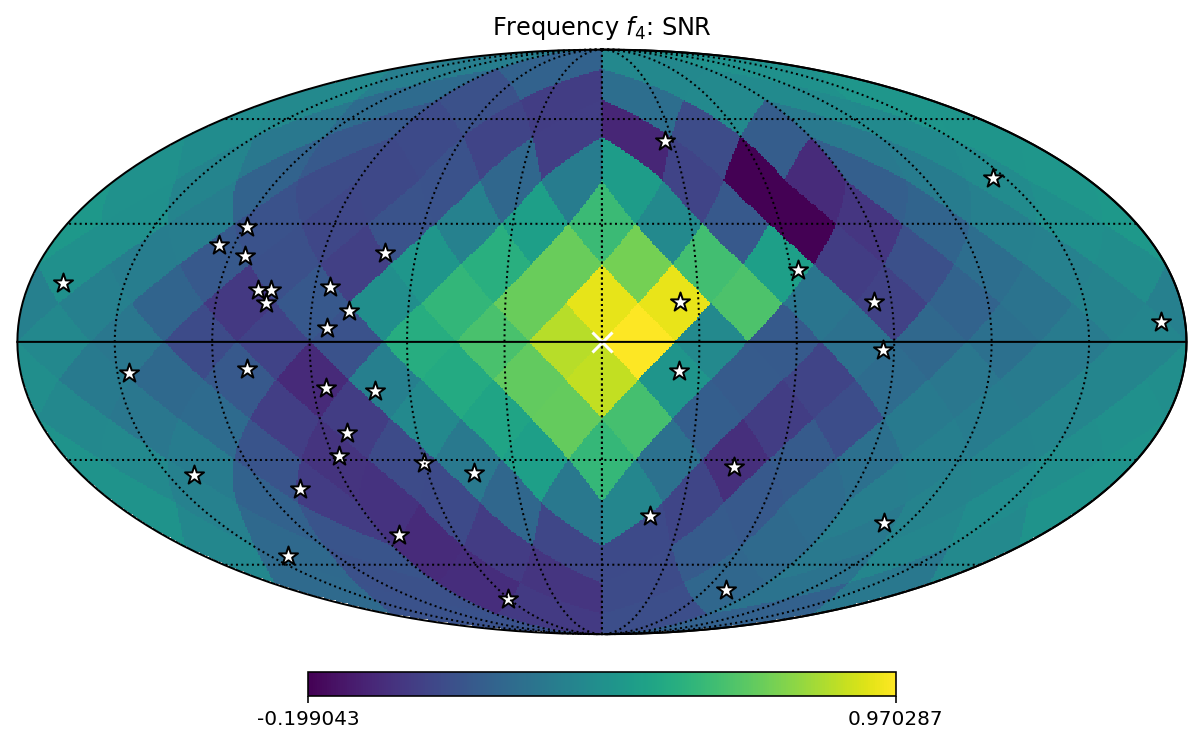

0.0 180.0 -180.0 180.0


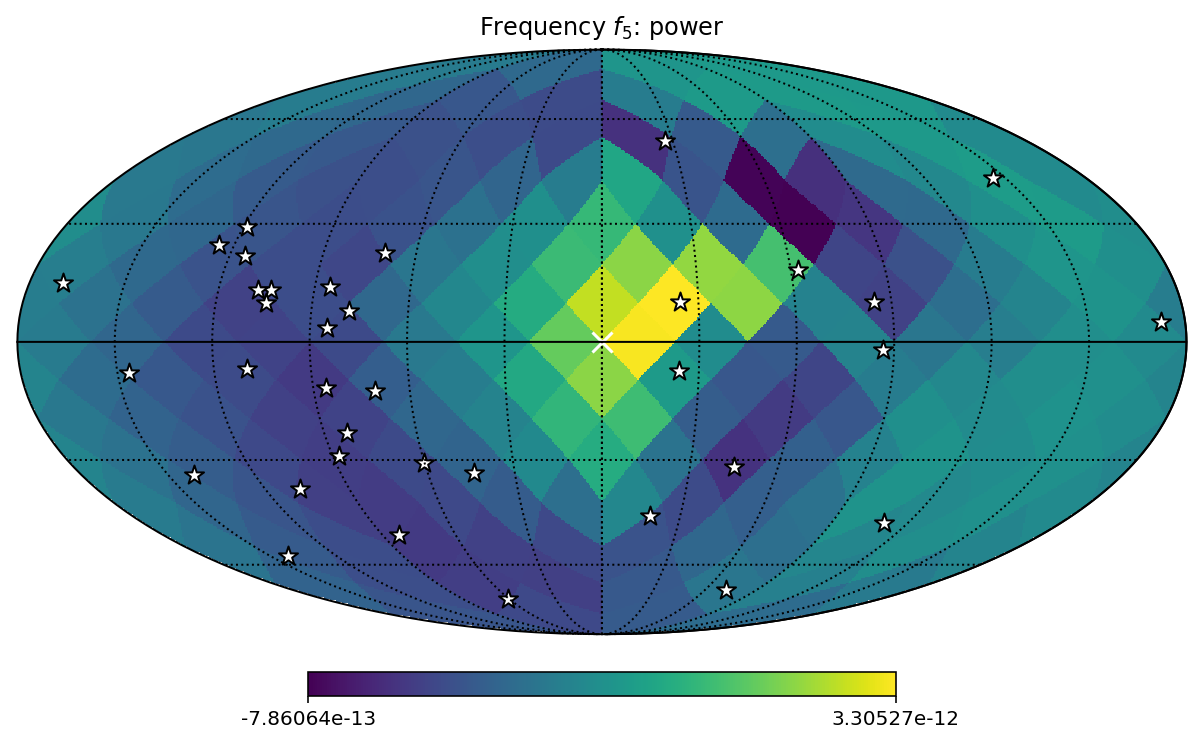

0.0 180.0 -180.0 180.0


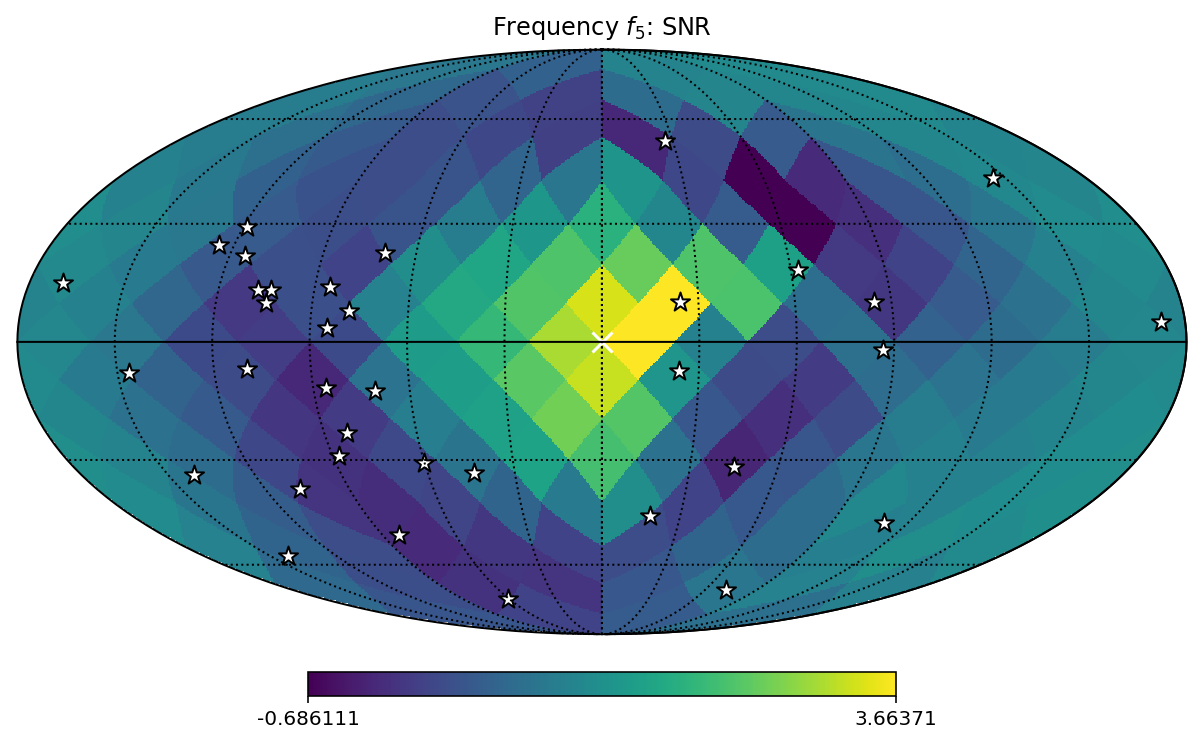

0.0 180.0 -180.0 180.0


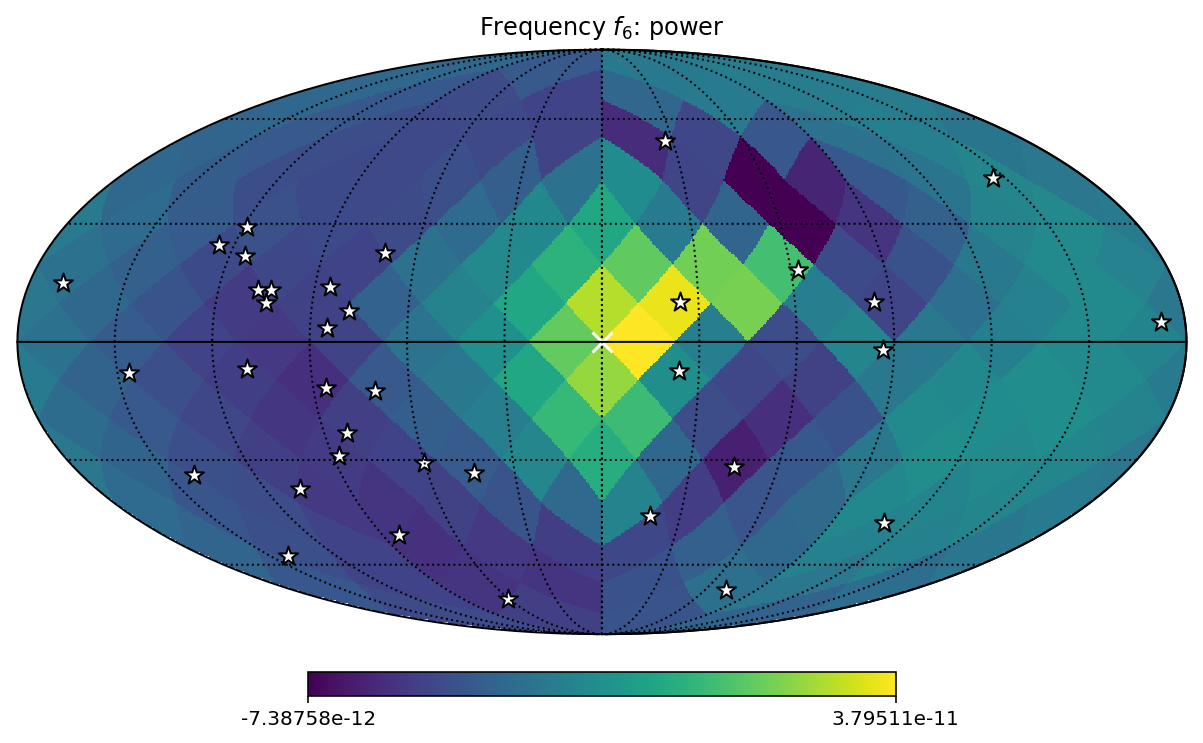

0.0 180.0 -180.0 180.0


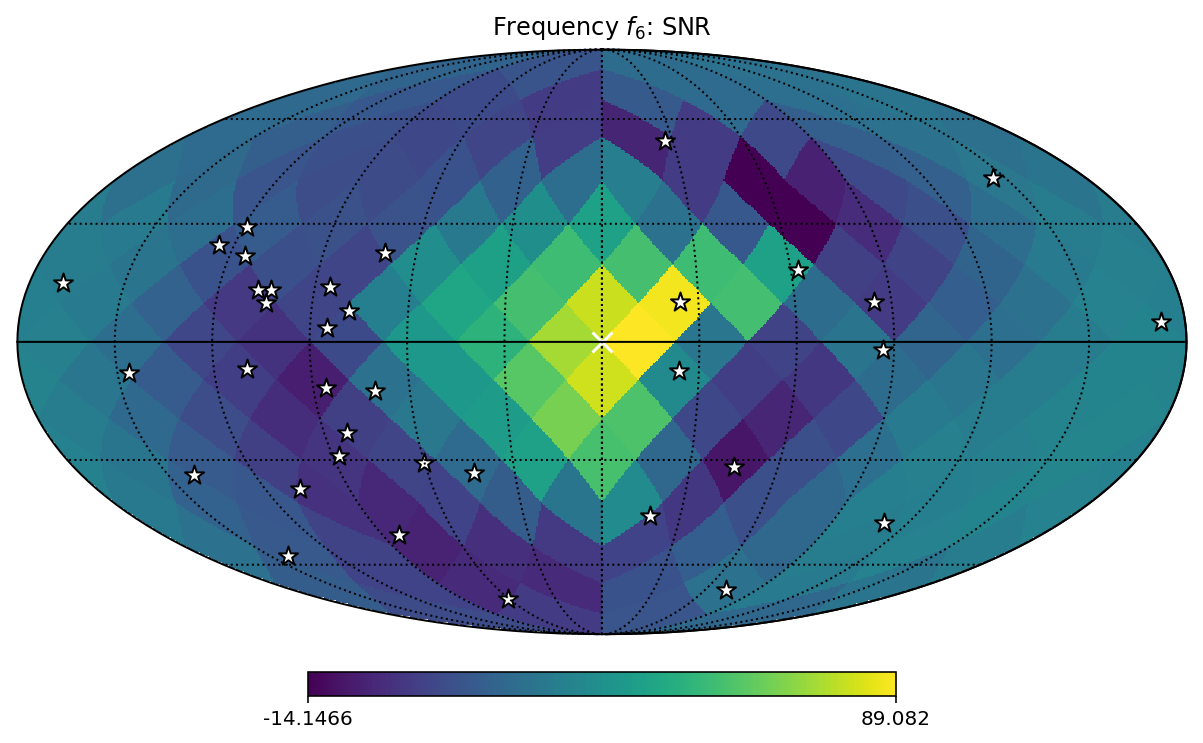

0.0 180.0 -180.0 180.0


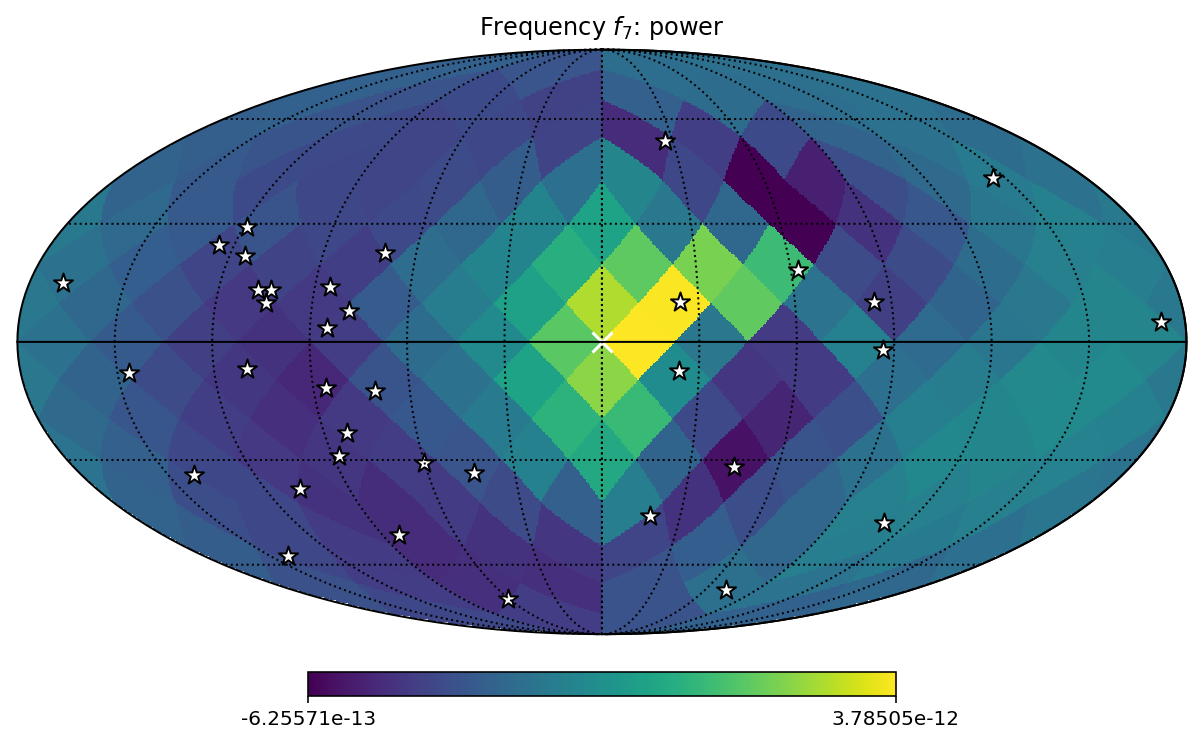

0.0 180.0 -180.0 180.0


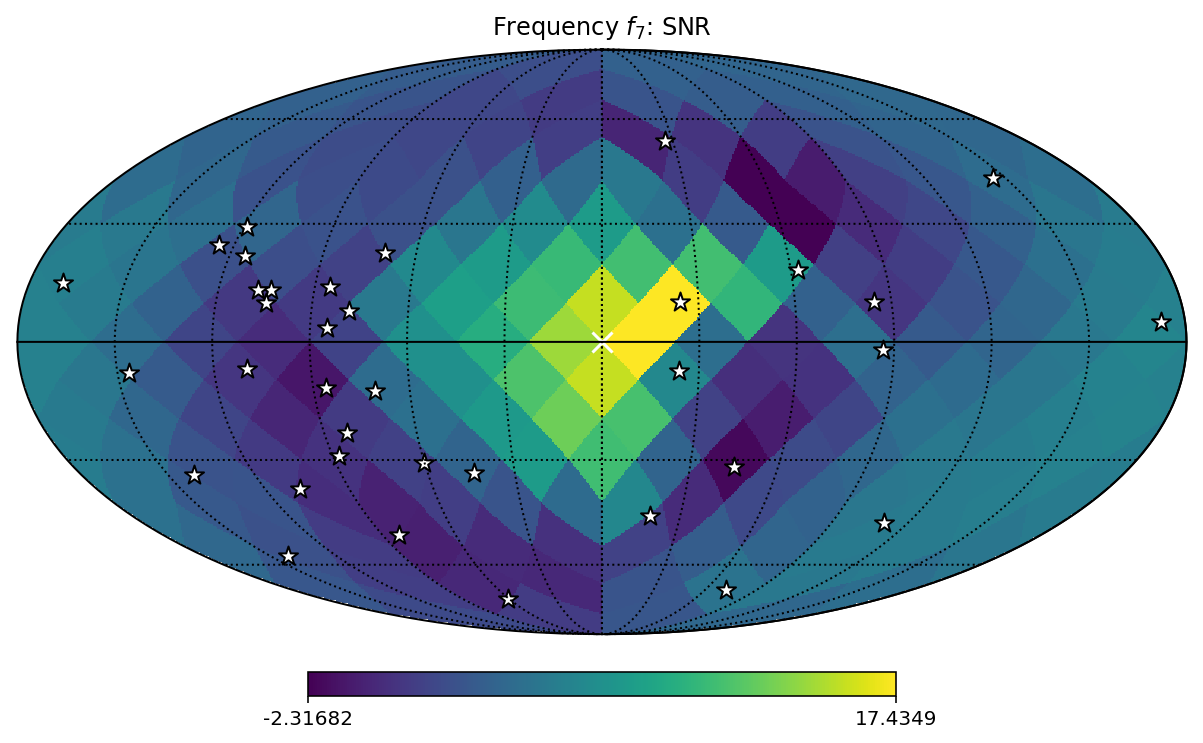

0.0 180.0 -180.0 180.0


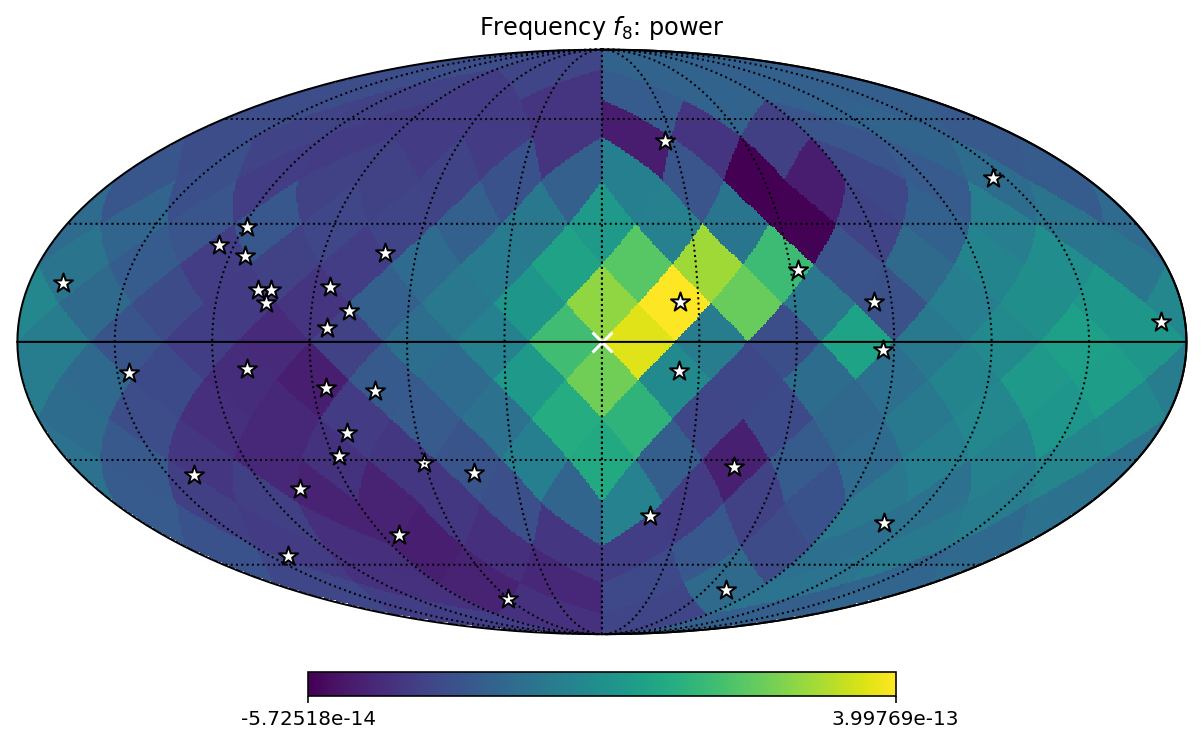

0.0 180.0 -180.0 180.0


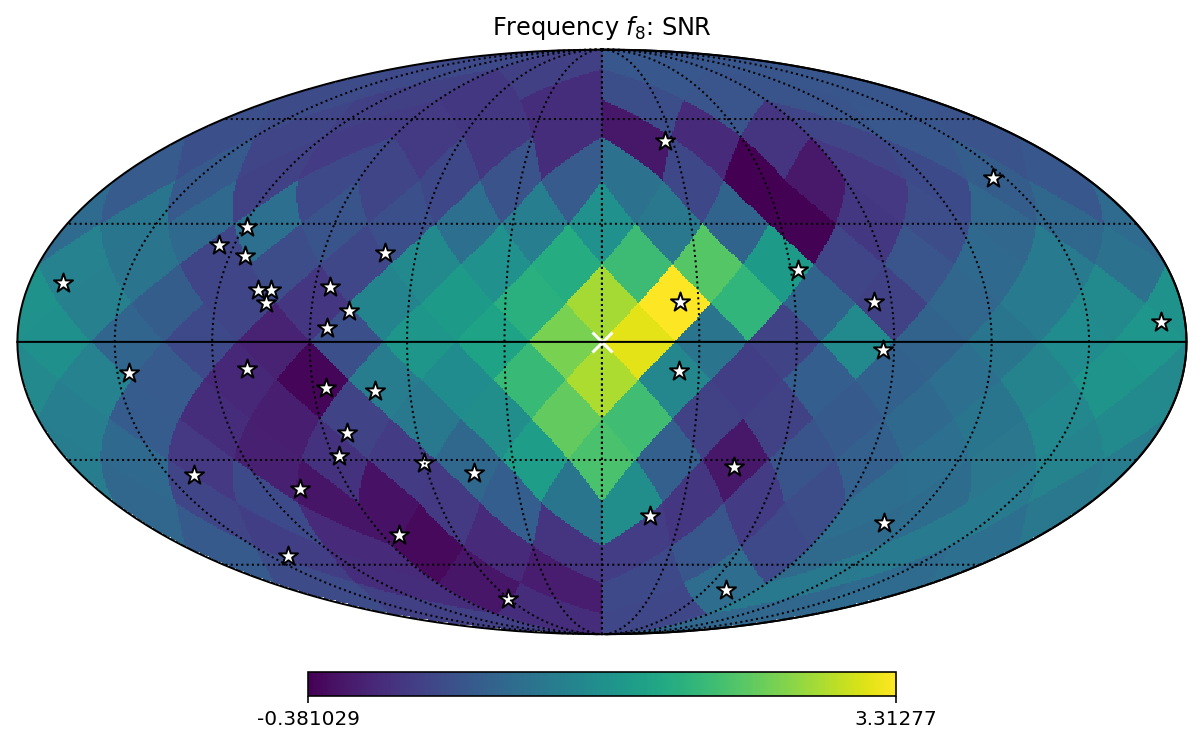

0.0 180.0 -180.0 180.0


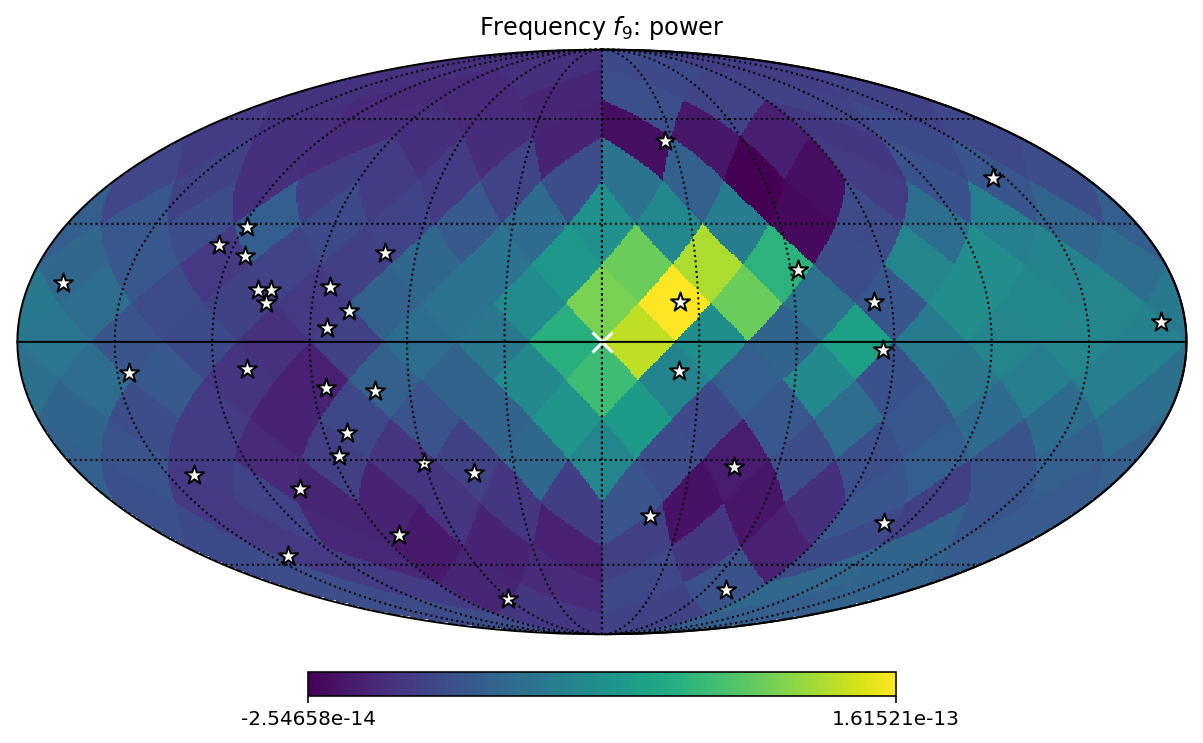

0.0 180.0 -180.0 180.0


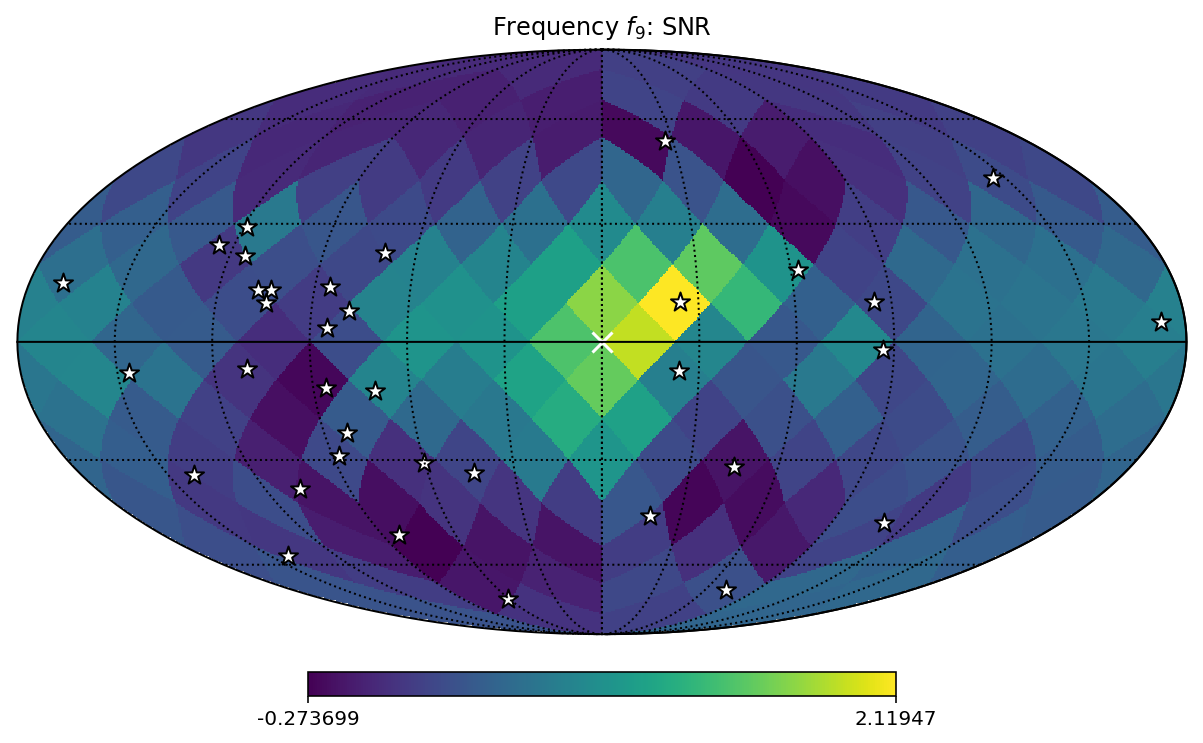

0.0 180.0 -180.0 180.0


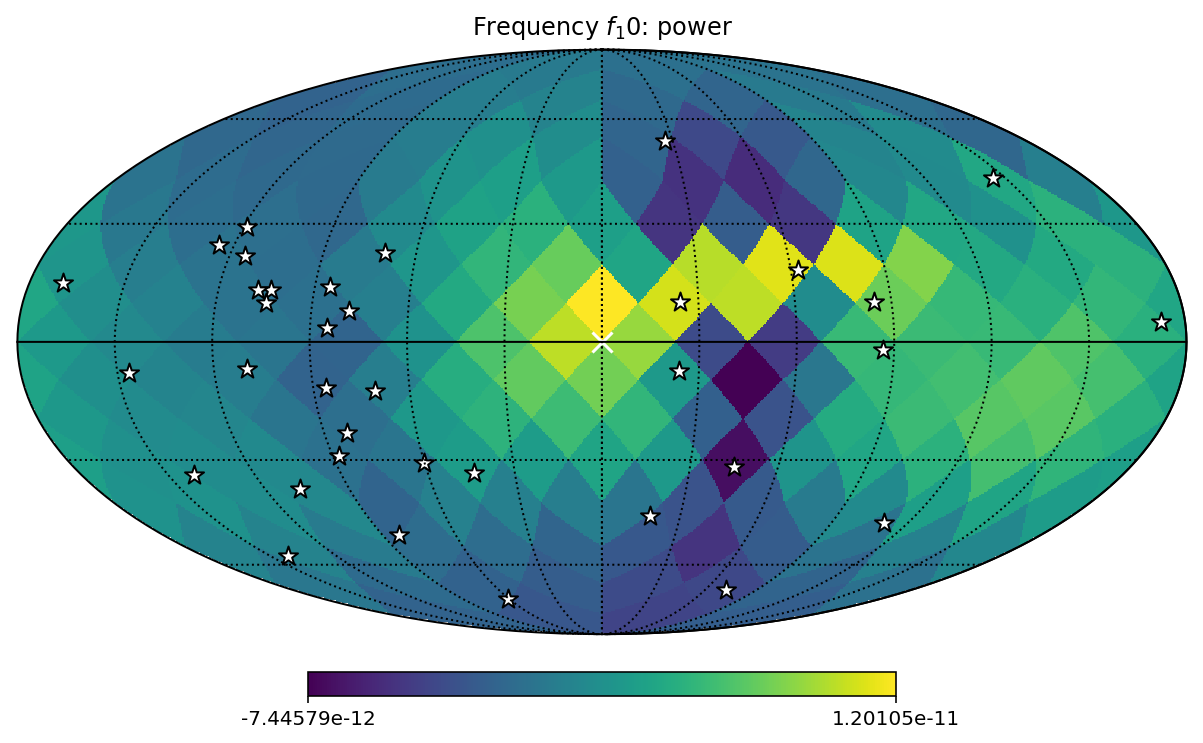

0.0 180.0 -180.0 180.0


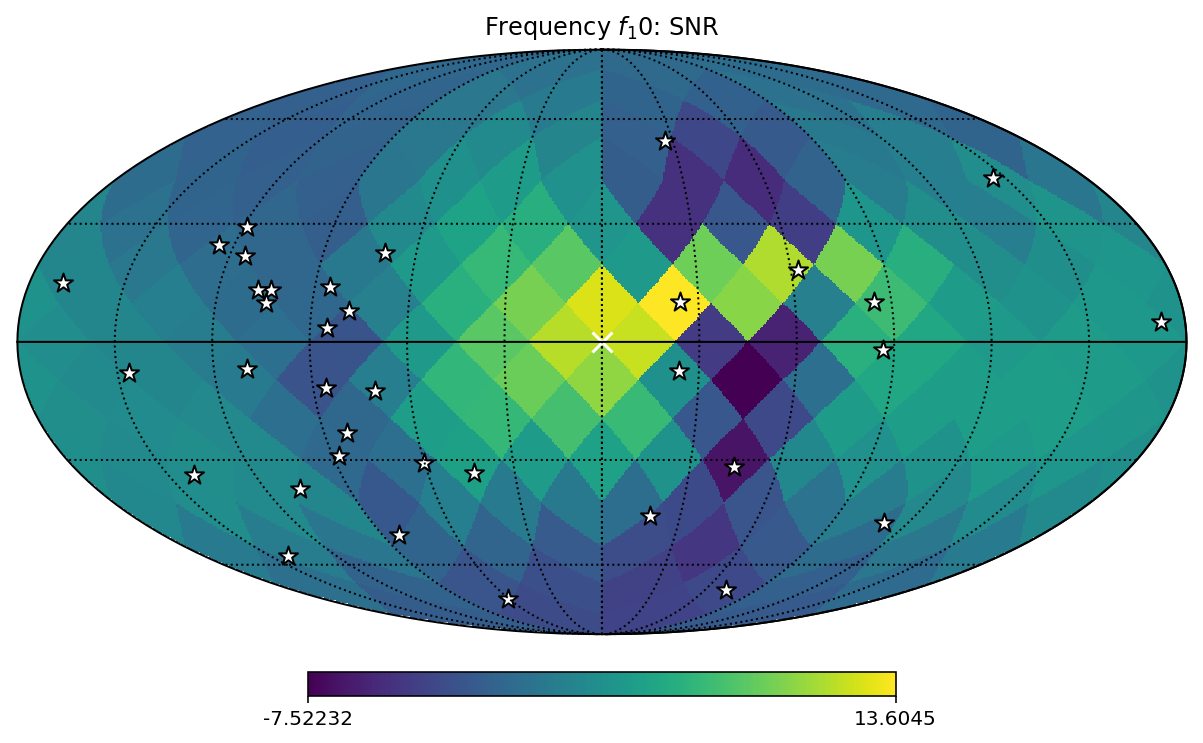

In [27]:
OS_obj.set_anisotropy_basis('pixel',nside,lmax,'hd')
xi,rhok,sigk,Ck,Sk,Sks = OS_obj.compute_PFOS(fisher_diag_only=True)

for i in range(OS_obj.nfreq):
    hp.mollview(utils.invert_skymap(Sk[i]),rot=180)
    plt.title(f'Frequency $f_{i+1}$: power')
    hp.visufunc.projscatter(theta=np.pi/2, phi=np.pi, c='white', s=100, marker='x')
    hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
    hp.graticule()
    plt.show()

    SNR = Sk[i]/np.sqrt(np.diag(Sks[i]))
    hp.mollview(utils.invert_skymap(SNR),rot=180)
    plt.title(f'Frequency $f_{i+1}$: SNR')
    hp.visufunc.projscatter(theta=np.pi/2, phi=np.pi, c='white', s=100, marker='x')
    hp.visufunc.projscatter(psr_theta, psr_phi, marker='*', color='white', edgecolors='k', s=100)
    hp.graticule()
    plt.show()

## Optimizing and implementing MAPS